# PROYECTO WALL-E




# Objetivos:
1.	Determinar la humedad del suelo y la temperatura ambiental de la planta *Calathea sp* utilizando Arduino
2.	Regular la temperatura ambiental, cuando la temperatura es alta, se encenderá un ventilador.
3.	Encender una luz LED, cuando el valor de humedad es bajo y la planta necesite agua.


# Conceptos teóricos que utilizaremos en este proyecto
* Digitalización y almacenamiento de señales: uso de la herramienta electrónica Arduino
* Circuitos y ley de Ohm
* Conductividad electrica: En el agua para conducir corriente eléctrica al aprovechar la propiedad de las sales en la conducción de esta.
* Conducción de calor: medicion de la temperatura ambiental 




# Cronograma
  *7 de junio*

*   Comprobación de materiales y conceptos básicos del proyecto.
*   Planificación y cronograma tentativo.
*   Busqueda y desarrollo de los códigos de sensores de humedad y temperatura.
*   Unificación de los códigos.
* Comprobación del correcto funcionamiento de los códigos y sensores.

*9 de junio*
* Búsqueda de materiales y toma de mediciones para fabricar un ambiente controlado (simil invernadero).
* Búsqueda de planos y pedido de impresión de una maceta en 3D.
* Armado del código para el funcionamiento del ventilador y sus conexiones.
* Posible incorporación de nuevos sensores.
* Relé

*14 de junio*
* Armado de la estructura del invernadero.
* Verificación de correcto funcionamiento.

*16 de junio*
* Recolección y análisis de datos.
* Armado de presentación.

*21 de junio*

* Presentación final del proyecto.






# Código reloj en tiempo real, pueden agregarse alarmas a ciertas horas del día

In [ ]:
*/

#include <Wire.h>		// incluye libreria para interfaz I2C
#include <RTClib.h>		// incluye libreria para el manejo del modulo RTC

RTC_DS3231 rtc;			// crea objeto del tipo RTC_DS3231

void setup () {
 Serial.begin(9600);		

 if (! rtc.begin()) {				 
 Serial.println("Modulo RTC no encontrado !");	
 while (1);					
 }
 rtc.adjust(DateTime(__DATE__, __TIME__));	
						// al momento de la compilacion. Comentar esta linea
}						

void loop () {
 DateTime fecha = rtc.now();			
 Serial.print(fecha.day());			
 Serial.print("/");			
 Serial.print(fecha.month());		
 Serial.print("/");				
 Serial.print(fecha.year());		
 Serial.print(" ");			
 Serial.print(fecha.hour());			
 Serial.print(":");				
 Serial.print(fecha.minute());			
 Serial.print(":");				
 Serial.println(fecha.second());		
 
 delay(1000);					
}

Averiguar como funciona adaptar un relee al reloj para que funcione durante una determinada hora, esto puede servir para activar un horario de riego o ventilacion diario. 

Codigo medidor de calidad ambiental que probé hace un rato, me da valores normales de entre 130-150 habiendo tenido una estufa a gas prendida. Y mayores a 250 al tirarle gas de un encendedor. Considerar que la medicion la hice en el momento y lo recomendable es que el medidor este 8 a 12 horas prendido hasta que pueda calentar de manera que comience a tirar valores mas adecuados. 

In [ ]:
void setup() {
  // put your setup code here, to run once:

}

void loop() {
  // put your main code here, to run repeatedly:
 int Valor_Sensor = analogRead(A0);
 String(Salida)= "CO2 " + String(Valor_Sensor) + "PPM";
 Serial.println(Salida);
 delay(3000);

}

Efectos co2 en plantas
 https://enviraiot.es/exceso-de-co2-en-las-plantas-efectos/#:~:text=Las%20plantas%2C%20durante%20el%20d%C3%ADa,capturando%20ox%C3%ADgeno%20y%20liberando%20CO2.

El codigo de josemaria para medir co2 https://github.com/josemariamendezruiz/arduino_nano/blob/69dc9b4ef96f9021790b0cecca4f883368468dd5/nano%20lectura%20de%20calidad%20del%20aire%20y%20muestra%20en%20pantalla%20lcd

Como preparar la placa para añadir el ventilador
https://itp.nyu.edu/physcomp/labs/motors-and-transistors/using-a-transistor-to-control-high-current-loads-with-an-arduino/ 

# Miércoles 7 de junio
Se realizó la comprobación de los posibles códigos a utilizarse y la actividad de los sensores. Luego, se logro unificarlos y que los dispositivos funcionen correctamente.

Pensando en las siguientes clases, surgieron nuevos interrogantes: ¿Cómo se registraron los datos? ¿La computadora deberá permanecer encendida?

*Posible código medidor de temperatura ambiental*

In [ ]:
int SENSOR; 
float TEMPERATURA; 


void setup(){ 

Serial.begin(9600); 

} 

void loop(){ 
SENSOR = analogRead(A0); 
TEMPERATURA = ((SENSOR * 5000.0) / 1023) / 10;

Serial.println(TEMPERATURA, 1); 

delay(1000); 

}


*Posible código opción 1 medidor de humedad*

In [ ]:
#define SENSOR

 Byte(v_sensor = 1);
void setup() {
  Serial.begin(9600);
  pinMode (SENSOR, INPUT);  

}

void loop() {
  v_sensor = digitalRead(SENSOR);

  if(v_sensor == 0) {
    Serial.println("Humedo");
    else{
          Serial.println("Seco");
    }
  }

}

*Posible código opción 2 sensor de humedad*

In [ ]:
void setup() {
  Serial.begin(9600);
}

void loop() {
  int lectura = analogRead(A0);

  Serial.print("La lectura es: ");
  Serial.println(lectura);


  if (lectura>=1000){
    Serial.println(">> El sensor está desconectado");
  }
  else if (lectura<1000 && lectura>=600){
        Serial.println(">> El suelo está seco");
  }
  else if (lectura<600 && lectura>=370){
        Serial.println(">> El suelo está húmedo");
  }
  else if (lectura<370){
        Serial.println(">> El suelo está muy húmedo");
  }
  delay(4000);
}

*Código final y unificado para medir humedad del suelo y temperatura ambiental*

In [ ]:

#include <OneWire.h>
#include <DallasTemperature.h>
 
// Bus 1-Wire en pin D9
const int ds18b20_pin = 9;
 
// Inicia los manejadores para el bus 1-Wire y el sensor
OneWire ds18b20_oneWire(ds18b20_pin);
DallasTemperature ds18b20_sensor(&ds18b20_oneWire);
 
void setup() {
    // Inicializa el puerto serie
    Serial.begin(9600);
    // Inicializa el bus 1-Wire
    ds18b20_sensor.begin(); 
}
 
void loop() {
    // Envia la orden al sensor para que capture la temperatura
    ds18b20_sensor.requestTemperatures();
 
    // Lee la temperatura capturada
    // y envia el resultado el monitor serie
    Serial.print(ds18b20_sensor.getTempCByIndex(0));
    Serial.println("ºC");
    // Espera 5 segundos antes de hacer una nueva lectura
    delay(5000); 

    int lectura = analogRead(A0);

  Serial.print("La lectura es: ");
  Serial.println(lectura);


  if (lectura>=1000){
    Serial.println(">> El sensor está desconectado");
  }
  else if (lectura<1000 && lectura>=800){
        Serial.println(">> El suelo está muy seco, regame YA");
  }
     else if (lectura<800 && lectura>=600){
        Serial.println(">> El suelo está seco, regame pronto");
  }
  else if (lectura<600 && lectura>=370){
        Serial.println(">> El suelo está húmedo, estoy muy bien");
  }
  else if (lectura<370){
        Serial.println(">> El suelo está muy húmedo, te pasaste de agua");
  }
  delay(5000);
}

Links de donde obtuvimos los códigos

Sensor humedad: https://acortes.co/proyecto-27-sensor-de-humedad-de-suelo/ 

Sensor de temperatura: https://proyectoarduino.com/sensor-de-temperatura/

Imagen de la planta con los sensores de humedad y temperatura ambiental

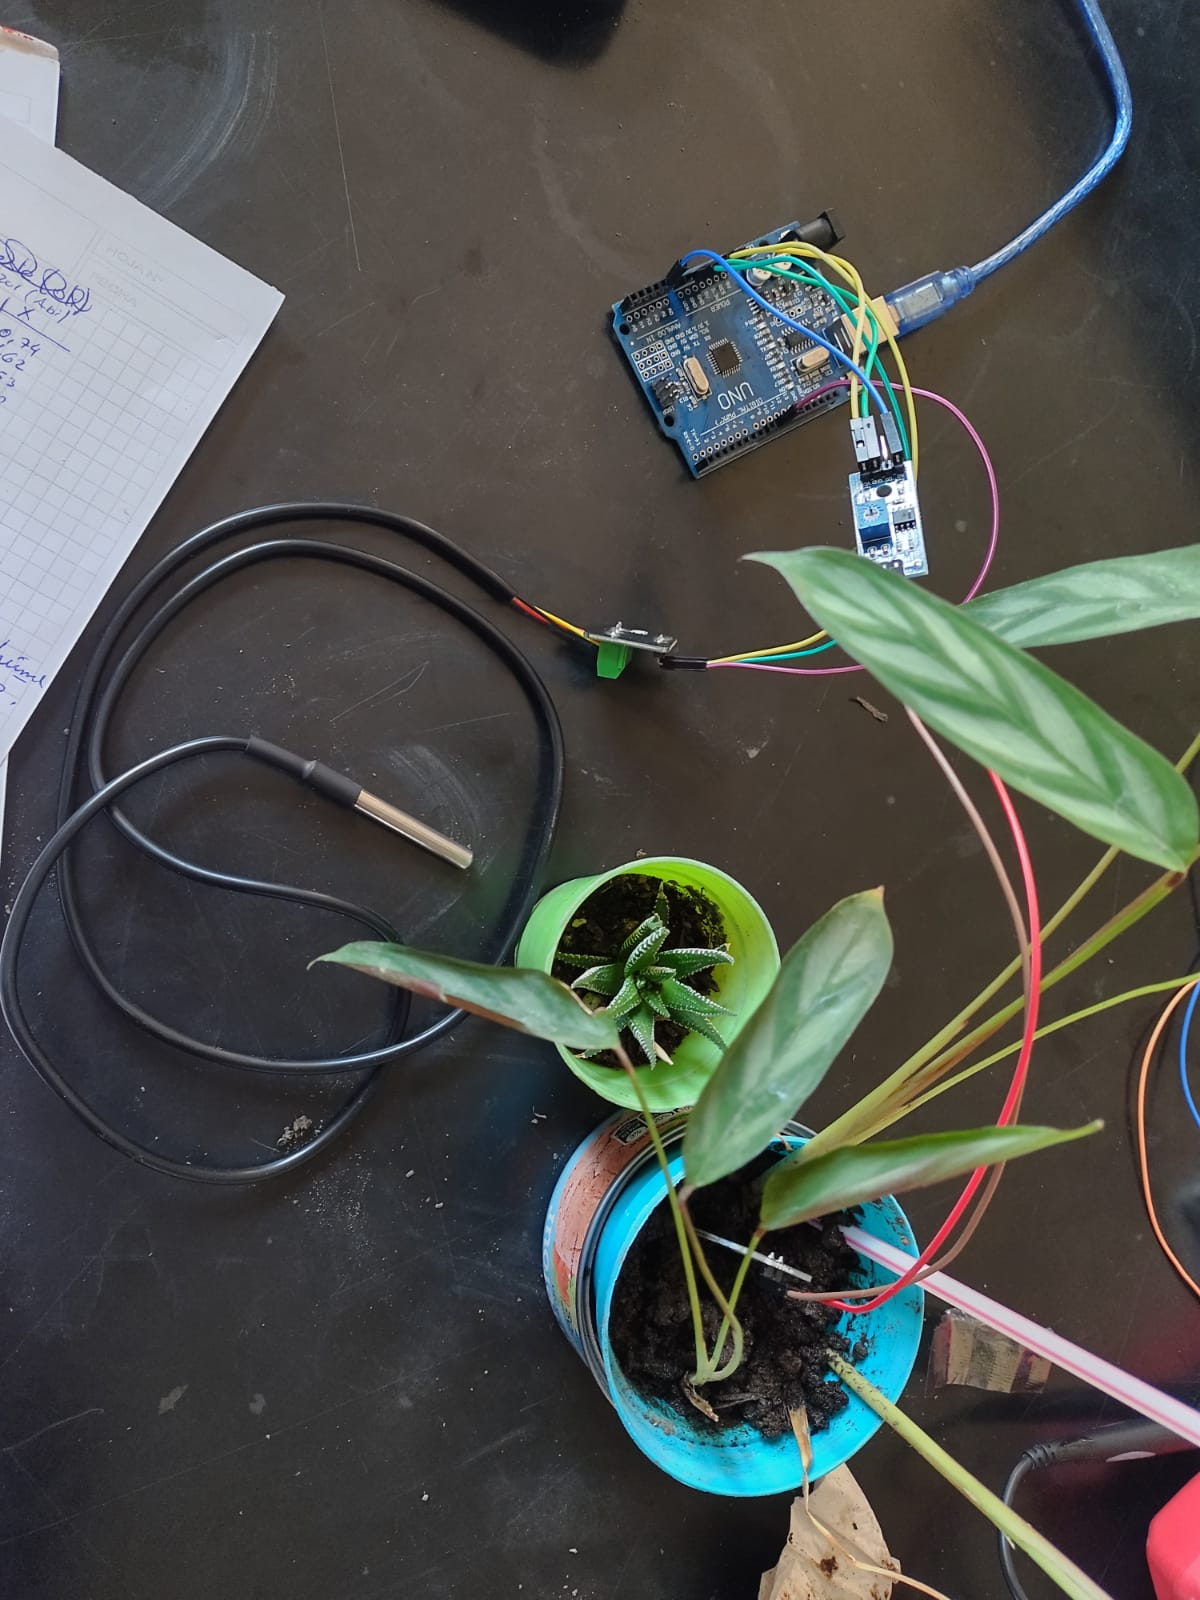


INSERTAR IMAGEN DEL ARDUINO CON TINKERCARD (despues modifico como se ve el sensor de temperatura desde la otra computadora)

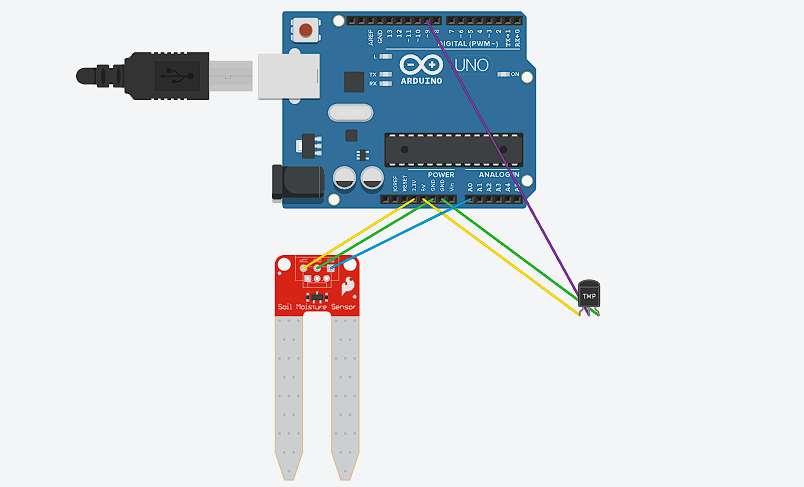

http://diwo.bq.com/utilizar-rele-arduino-zum-core/ conectar rele a arduino

# Viernes 9 de junio
Se probo el funcionamiento de dos ventiladores de diferentes tamaños. Se seleccionó aquel que poseera mayor capacidad de disipar el calor en nuestro futuro invernadero.
Luego, se buscaron los códigos para el funcionamiento y su conexión entre el arduino y el rele. Como asi tambien, el encendido de la luz led con una resistencia de 9 kohm.
Además, se esquematizó el invernadero, se tomaron medidas y se escogieron las ubicaciones correspondiente de cada componente. Se detallan a continuación la lista de materiales.

   *Materiales para el invernadero*

*  2 paredes de madera (21 x 30) cm
*  Base (27x21) cm con grosor considerable
*  2 Vigas de 30 cm :)
*   Lona transparente (30 x 100) cm :)
*   Ventilador :)
*   Fuente de poder
*   Relé :)
*   Recipiente de agua (alto de 4cm minimo)


   *Maceta 3D*

Ya se realizó el pedido de la maceta 3D. 

Elegida: 
https://www.thingiverse.com/thing:5359312
Color: rojo o azul
Tamaño: 9x9cm 

Una de las posibles soluciones ante el problema presentado el miercoles 7/6, utilizar un adaptador SD o dejar encendida la computadora de la oficina de física por dos días (hasta la recolección de datos necesarios).

Conexión Rele al ventilador

![image.png](
bujzunVsbtDAjuJHcA5xFdD21w7I+n9oCQTyqZiQlBt/Qn9JTuxBaU8n3Bv3WX33BHyBu++s4aGuMxS6e85KF0N/hfv351vPf++/UcENVixzMPLLjhhd8Gu+VLc76v9QCSNuK7wn46B3xUg1M+ht1UvQC38R/68PHVsq/wku14qNrdWHcG4THvILRv4et7slCOJTaSFY8Jp5J16JRLLi8vj/8f+2f2s535m/gAAAAASUVORK5CYII=)

Codigo rele arduino

In [ ]:
const int rele = 2;
 
/***   Setup  ***/
void setup() {
    pinMode(rele,OUTPUT);
}
 
/***   Loop  ***/
void loop() {
    digitalWrite(rele, HIGH);
    delay(15000);
    digitalWrite(rele, LOW);
    delay(15000);
}

Código led 

In [ ]:

int led = 7;
void setup(){
  pinMode(led, OUTPUT);
}
void loop(){
  digitalWrite(led,HIGH);
  delay(5000);
  digitalWrite(led,LOW);
  delay(5000);
}


**Modelo del Invernadero** (no esta a escala)

Dos paredes de madera, en la cual una del lado de adentro se va a encontrar un ventilador y la otra del lado de afuera tendra el arduino y las conexiones con el protoboard.

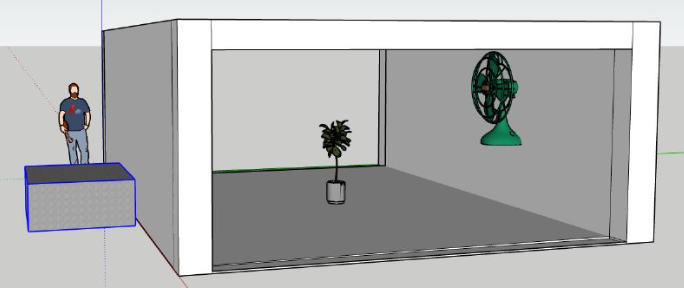

Problemas del día:
La fuente de 12v no es de un tamaño adecuado para ser portable.
Solucionar la carcasa del ventilador (traer gotita).



# Miércoles 14 de Junio

Proximamente: Ensamblaje del invernadero y dejar midiendo los datos.
Nuevos problemas. 

Continuará ....